# Dự án: Phân loại điểm tín dụng 

## 1. Giới thiệu

### 1.1. Đặt vấn đề
Rủi ro tín dụng là khả năng khách hàng không trả được nợ theo thỏa thuận ban đầu. Vì tỉ trọng tín dụng là đáng kể trong danh mục tài sản của hầu hết các ngân hàng nên việc khách hàng không trả được nợ sẽ ảnh hưởng trực tiếp đến kết quả kinh doanh và tiềm năng phát triển trong tương lai của ngân hàng. Để kiểm soát rủi ro tín dụng nhằm hạn chế tổn thất, các ngân hàng luôn không ngừng cải thiện năng lực quản trị rủi ro để có thể đo lường chính xác nhất khả năng khách hàng không trả được nợ.


Theo truyền thống, ngân hàng thuê các chuyên viên chỉ để đánh giá hồ sơ của cá nhân và quyết định xem có an toàn để cấp vay cho họ hay không. Lúc đó, họ đánh giá độ xứng đáng của người vay bằng một điểm số số liệu, còn được biết đến là “Điểm tín dụng”. Điểm này giúp các cơ quan quản lý ước lượng xác suất người vay trả nợ trong thời gian và điều kiện đã thỏa thuận dựa trên lịch sử tín dụng và/hoặc lịch sử thanh toán của người xin vay cùng với nền tảng của họ. 


Ta có thể thấy phương pháp tốn nhiều thời gian, chi phí và phụ thuộc nhiều vào cảm tính, chủ yếu là sự đánh giá chủ quan của nhân viên kiểm soát rủi ro. Chính vì thế, cùng với sự phát triển của công nghệ, các thuật toán học máy đã được áp dụng nhằm đưa ra những đánh giá nhanh, chính xác hơn.

### 1.2. Bài toán
Từ các đặc trưng liên quan đến khách hàng và lịch sử tín dụng của học, mô hình học máy sẽ đánh giá và cho ra kết quả là khách hàng có/không khả năng trả nợ. 


# 2. Thu thập dữ liệu
Sử dụng tập dữ liệu trên nền tảng Kaggle là [Credit Risk Dataset](https://www.kaggle.com/datasets/laotse/credit-risk-dataset). Tập dữ liệu này có định dạng ```.csv``` bao gồm khoảng 300 triệu giao dịch vay được thực hiện bởi 32 581 cá nhân. Bộ dữ liệu này bao gồm tổng cộng 11 đặc trưng, mô tả hồ sơ của mỗi cá nhân, được liệt kê trong bảng dưới đây. 
| Đặc trưng| Định nghĩa |
| ------------- | ------------- |
| person_age | Tuổi của cá nhân |
| person_income | Thu nhập hàng năm của cá nhân |
| person_home_ownership | Loại sở hữu nhà - thuê, thế chấp, thuê mua, sở hữu hoặc khác |
| person_emp_length | Thời gian làm việc của cá nhân (theo năm) |
| loan_intent | Mục đích của khoản vay |
| loan_amnt | Số tiền vay |
| loan_int_rate | Lãi suất đối với khoản vay |
| loan_percent_income | Tỷ lệ phần trăm số tiền vay theo tổng thu nhập |
| cb_person_default_on_file | Lịch sử các khoản nợ (nếu có) được thực hiện bởi cá nhân |
| cb_person_cred_hist_length | Lịch sử tín dụng của cá nhân |
| loan_grade | Đánh giá khoản vay (A-G) |
| **loan_status** | **Trạng thái thanh toán khoản vay (0 là đã trả nợ, 1 là vỡ nợ)**|

# 3. Tiền xử lý dữ liệu

## 3.1. Làm sạch dữ liệu

Ta sẽ sử dụng ```pandas``` để đọc dữ liệu từ file ```credit_risk_dataset.csv```

In [141]:
import pandas as pd
df = pd.read_csv("/com.docker.devenvironments.code/credit_risk_dataset.csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


Trước hết, ta cần xem thông tin tổng quan của dữ liệu thu thập được

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


Vì tập dữ liệu bao gồm dữ liệu của 32581 cá nhân nên tả có thể thấy đa phần các đặc trưng đều không bị thiếu dữ liệu chỉ có đặc trưng ```person_emp_length``` và ```loan_int_rate``` bị thiếu dữ liệu. Vì tính chính xác của việc đánh giá tín dụng nên ta sẽ tiến hành loại bỏ các dữ liệu bị thiếu

In [143]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28638 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28638 non-null  int64  
 1   person_income               28638 non-null  int64  
 2   person_home_ownership       28638 non-null  object 
 3   person_emp_length           28638 non-null  float64
 4   loan_intent                 28638 non-null  object 
 5   loan_grade                  28638 non-null  object 
 6   loan_amnt                   28638 non-null  int64  
 7   loan_int_rate               28638 non-null  float64
 8   loan_status                 28638 non-null  int64  
 9   loan_percent_income         28638 non-null  float64
 10  cb_person_default_on_file   28638 non-null  object 
 11  cb_person_cred_hist_length  28638 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.8+ MB


Ta có thể thấy bây giờ dữ liệu đã được loại bỏ các giá trị bị thiếu

Tiếp đến, ta sẽ kiểm tra xem dữ liệu có bị trùng lặp không?

In [144]:
print("Số dữ liệu trùng lặp: {0}".format(df[df.duplicated()].shape[0]))

Số dữ liệu trùng lặp: 137


Ta thấy có 137 dữ liệu bị trùng lặp, ta sẽ tiến hành xóa các dữ liệu trùng lặp này

In [145]:
df.drop_duplicates(inplace=True)
print("Số dữ liệu trùng lặp: {0}".format(df[df.duplicated()].shape[0]))

Số dữ liệu trùng lặp: 0


Tiếp theo, ta cùng xem thông số của các đặc trưng

In [146]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28501.000000,2.850100e+04,28501.000000,28501.000000,28501.000000,28501.000000,28501.000000,28501.000000
mean,27.738676,6.665441e+04,4.790148,9658.533034,11.045385,0.217115,0.169517,5.800498
std,6.316166,6.237603e+04,4.157462,6329.604672,3.230748,0.412289,0.106410,4.042153
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.950000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.600000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


Ta có thể thấy, ở ```person_age``` và ```person_emp_length``` có giá trị ```max``` là ```144``` và ```123``` trong khi giá trị ```mean``` của chúng là ```27``` và ```4```.

Để có cái nhìn rõ hơn ta sẽ sử dụng ```matplotlib``` để vẽ biểu đồ ```box plot``` để xem phân bố của chúng.

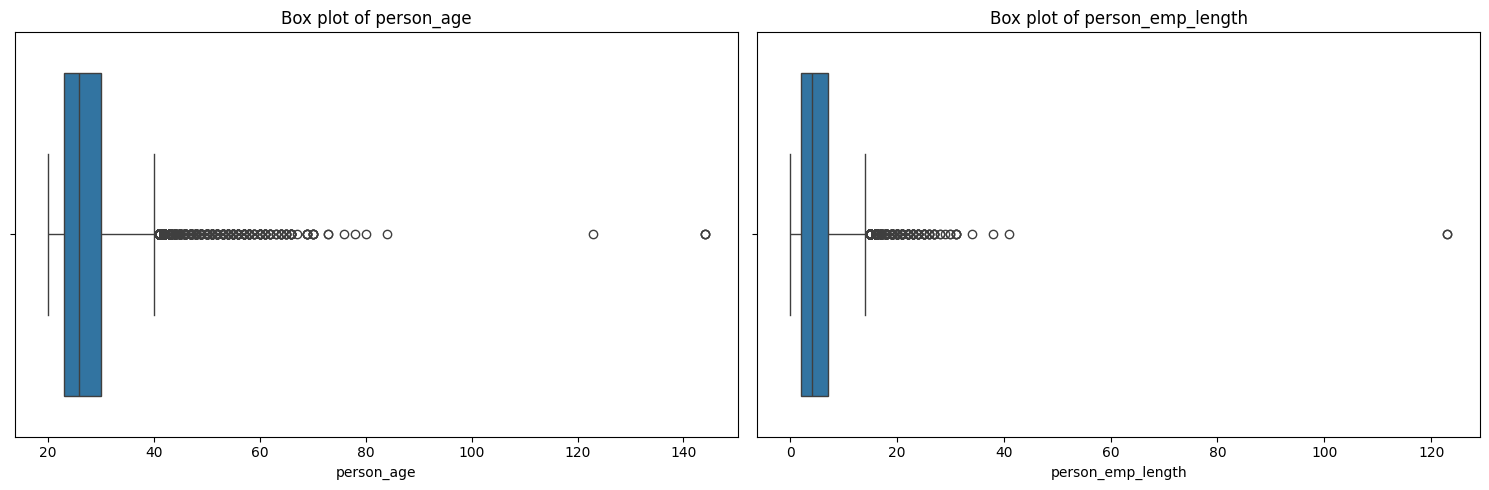

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(x=df['person_age'], ax=axs[0])
axs[0].set_title('Box plot of person_age')

sns.boxplot(x=df['person_emp_length'], ax=axs[1])
axs[1].set_title('Box plot of person_emp_length')

plt.tight_layout()
plt.show()

Ta có thể thấy có vài điểm nằm rất xa so với với các dữ liệu còn lại. Ta sẽ tiến hành xóa các điểm ngoại biên này vì chúng có thể ảnh hương đến hiệu suất của mô hình. Ở đây ta cũng có thể thấy rất nhiều điểm nằm ngoài râu của 2 biểu đồ, tuy nhiên ta sẽ không xóa chúng vì ta có thể làm mất thông tin quan trọng liên quan đến nhóm khách hàng lớn tuổi hơn dẫn đến mô hình bị bias, thay vào đó ta sẽ dùng phương pháp chuẩn hóa được trình bày sau đây để giải quyết vấn đề này

In [148]:
# Loại bỏ các giá trị ngoại biên
df = df[(df['person_age'] < 80) & (df['person_emp_length'] < 60)]

## 3.2. Chuyển đổi dữ liệu

Như ta có thể thấy ở trên, tập dữ liệu của chúng ta chứa một số đặc trưng không phải dạng số như ```person_home_ownership```, ```loan_intent``` và ```cb_person_default_on_file ```. Tuy nhiên, mô hình học máy không thể xử lý trực tiếp dữ liệu chuỗi. Chính vì thế, ta cần chuyển đổi dữ liệu dạng chuỗi thành dạng số

Đầu tiên, ta sẽ xem các đặc trưng này có những giá trị nào

In [149]:
object_features = df[['person_home_ownership', 'loan_intent', 'cb_person_default_on_file', 'loan_grade']]
for column in object_features.columns:
    print(f"{column}: {object_features[column].unique()}")
object_features

person_home_ownership: ['OWN' 'MORTGAGE' 'RENT' 'OTHER']
loan_intent: ['EDUCATION' 'MEDICAL' 'VENTURE' 'PERSONAL' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
cb_person_default_on_file: ['N' 'Y']
loan_grade: ['B' 'C' 'A' 'D' 'E' 'F' 'G']


,person_home_ownership,loan_intent,cb_person_default_on_file,loan_grade
1,OWN,EDUCATION,N,B
2,MORTGAGE,MEDICAL,N,C
3,RENT,MEDICAL,N,C
4,RENT,MEDICAL,Y,C
5,OWN,VENTURE,N,A
...,...,...,...,...
32576,MORTGAGE,PERSONAL,N,C
32577,MORTGAGE,PERSONAL,N,A
32578,RENT,HOMEIMPROVEMENT,N,B
32579,MORTGAGE,PERSONAL,N,B


Ta có thể thấy ở trên, ```cb_person_default_on_file``` chỉ có hai giá trị là ```Y``` và ```N``` nên ta sẽ sử dụng label encoding: ```Y``` được chuyển đổi thành ```1``` và ```N``` được chuyển đổi thành 0, ```loan_grade``` là đánh giá rủi ro từ A-G được chuyển đổi thành từ 0-5. Còn với ```person_home_ownership``` và ```loan_intent``` là các đặc trưng không có thứ tự ta sẽ sử dụng one-hot encoding để chuyển đổi dữ liệu.

In [150]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['cb_person_default_on_file'] = label_encoder.fit_transform(df['cb_person_default_on_file'])
df['loan_grade'] = label_encoder.fit_transform(df['loan_grade'])

/tmp/ipykernel_6713/3950030514.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cb_person_default_on_file'] = label_encoder.fit_transform(df['cb_person_default_on_file'])
/tmp/ipykernel_6713/3950030514.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['loan_grade'] = label_encoder.fit_transform(df['loan_grade'])


In [151]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
ohe_colums = ['person_home_ownership', 'loan_intent']
ohe.fit(df[ohe_colums])
merge_ohe_col = np.concatenate((ohe.categories_[0], ohe.categories_[1],))
ohe_data = pd.DataFrame(ohe.transform(df[ohe_colums]).toarray(), columns=merge_ohe_col, index=df.index)
df_new = pd.concat([ohe_data, df], axis=1)
df_new.drop(ohe_colums, axis=1, inplace=True)
df_new

,MORTGAGE,OTHER,OWN,RENT,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,21,9600,5.0,1,1000,11.14,0,0.10,0,2
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,25,9600,1.0,2,5500,12.87,1,0.57,0,3
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,23,65500,4.0,2,35000,15.23,1,0.53,0,2
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,24,54400,8.0,2,35000,14.27,1,0.55,1,4
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,21,9900,2.0,0,2500,7.14,1,0.25,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,57,53000,1.0,2,5800,13.16,0,0.11,0,30
32577,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,54,120000,4.0,0,17625,7.49,0,0.15,0,19
32578,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,65,76000,3.0,1,35000,10.99,1,0.46,0,28
32579,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,56,150000,5.0,1,15000,11.48,0,0.10,0,26
